# Problem 4 – Exploratory Data Analysis (Cleaned Data)

This notebook performs **post-cleaning EDA** on the processed asthma dataset saved in `data/processed/`.

**Goals**
- Understand distributions after cleaning
- Inspect relationships among features
- Examine correlation with the target (`Diagnosis`)
- Capture insights that inform feature selection and modeling


In [21]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 4)
pd.set_option("display.max_columns", 100)

## 1) Load cleaned dataset
We analyze the **processed** data produced in Problem 3. If the file is missing, double-check the preprocessing step that writes `data/processed/asthma_clean.csv`.

In [22]:
path = "../data/processed/asthma_clean.csv"
df = pd.read_csv(path)
print("Cleaned data shape:", df.shape)
df.head()

Cleaned data shape: (2392, 28)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,FEV1_FVC_ratio
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,0.277068
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,1.290987
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,0.338077
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,1.318186
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,1.131243


## 2) Quick sanity checks (compare with step 3 and 4 in the 02_data_exploration.ipynb)
- No missing values should remain after preprocessing.
- Data types should be numeric (or encoded) for modeling.

In [23]:
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

Age                  0
Gender               0
Diagnosis            0
ExerciseInduced      0
NighttimeSymptoms    0
Coughing             0
ChestTightness       0
ShortnessOfBreath    0
Wheezing             0
LungFunctionFVC      0
dtype: int64

## 3) Target distribution
Examine class balance of `Diagnosis` (0 = negative, 1 = positive). Strong imbalance suggests stratified splits and metrics like ROC-AUC, PR-AUC, or F1.

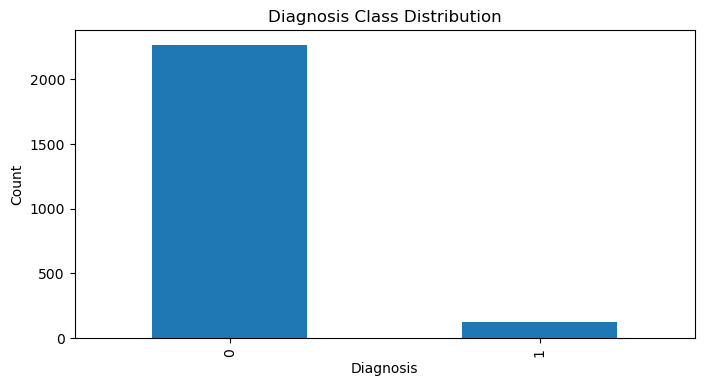

Class proportions (%):
 Diagnosis
0    94.82
1     5.18
Name: proportion, dtype: float64


In [24]:
ax = df["Diagnosis"].value_counts().sort_index().plot(kind="bar")
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

class_props = (df["Diagnosis"].value_counts(normalize=True) * 100).round(2)
print("Class proportions (%):\n", class_props)

## 4) Numeric feature distributions (histograms)
Histograms help spot skew, outliers, and discretized/binary variables.

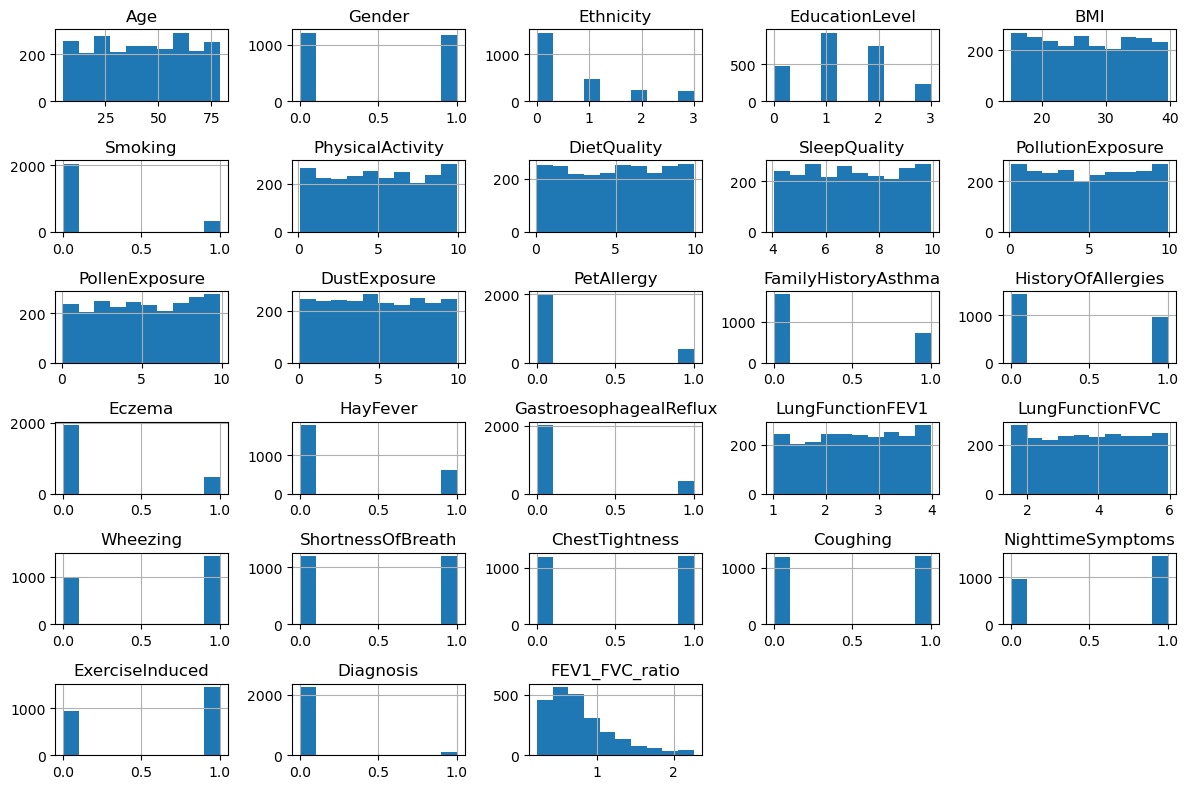

In [25]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## 5) Correlation analysis (numeric only)
We look at Pearson correlations between numeric features. The heatmap is masked to show only the lower triangle for readability.

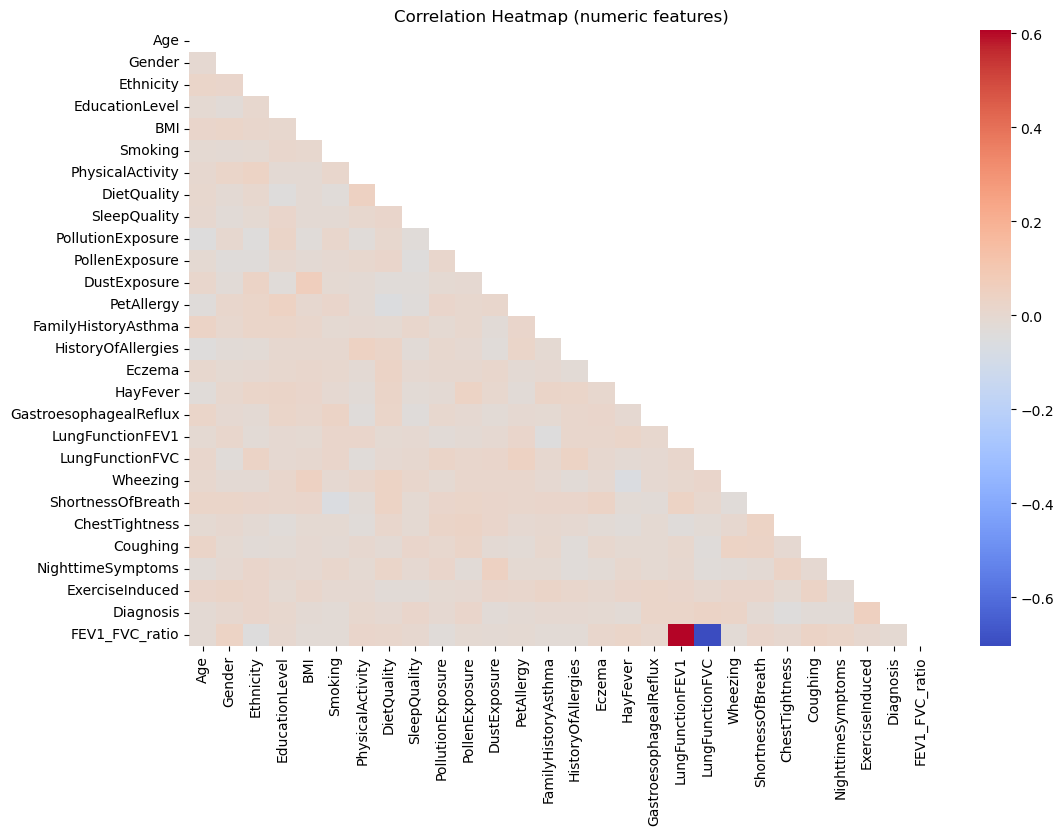

In [26]:
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

## 6) Correlation with the target (`Diagnosis`)
Sorted correlations indicate which features are linearly associated with the target. Remember this is *univariate* and linear; it does not replace model-based feature importance.

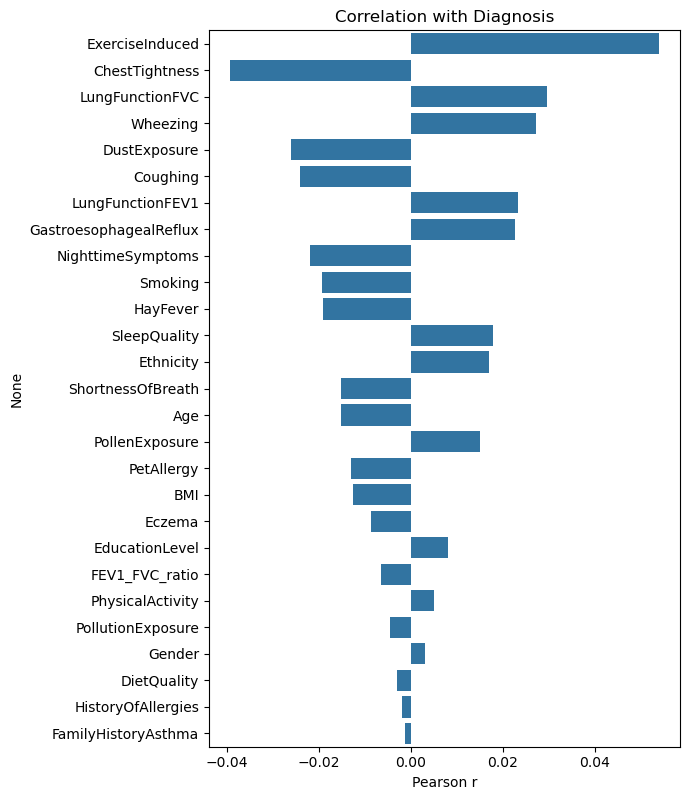

ExerciseInduced           0.053956
ChestTightness           -0.039278
LungFunctionFVC           0.029713
Wheezing                  0.027197
DustExposure             -0.026027
Coughing                 -0.024193
LungFunctionFEV1          0.023310
GastroesophagealReflux    0.022770
NighttimeSymptoms        -0.021965
Smoking                  -0.019321
Name: Diagnosis, dtype: float64

In [27]:
target_corr = corr["Diagnosis"].drop(labels=["Diagnosis"]).sort_values(key=np.abs, ascending=False)
plt.figure(figsize=(7, max(4, 0.3*len(target_corr))))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Correlation with Diagnosis")
plt.xlabel("Pearson r")
plt.tight_layout()
plt.show()
target_corr.head(10)

## 7) Grouped distributions for clinically relevant features
Compare lung function measures across classes. Boxplots (or violin plots) can show separation and potential predictive signal.

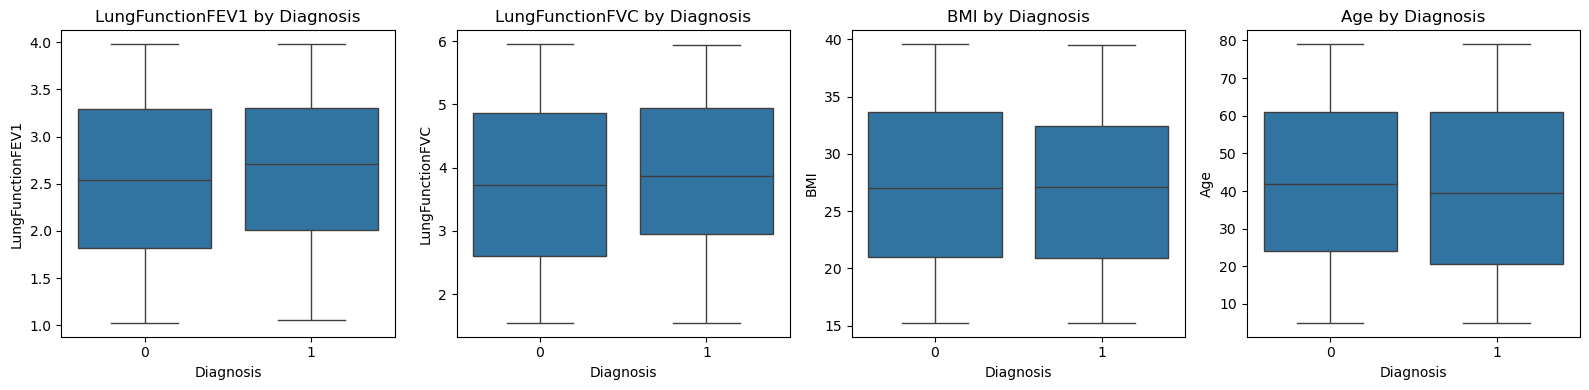

In [28]:
features_to_plot = [c for c in ["LungFunctionFEV1", "LungFunctionFVC", "BMI", "Age"] if c in df.columns]
n = len(features_to_plot)
if n:
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))
    if n == 1:
        axes = [axes]
    for ax, col in zip(axes, features_to_plot):
        sns.boxplot(data=df, x="Diagnosis", y=col, ax=ax)
        ax.set_title(f"{col} by Diagnosis")
    plt.tight_layout()
    plt.show()
else:
    print("Selected features not present after preprocessing.")

## 8) Optional: Pairplot on a small subset
Useful for spotting simple non-linear separations. Keep the subset small to avoid slow plots.

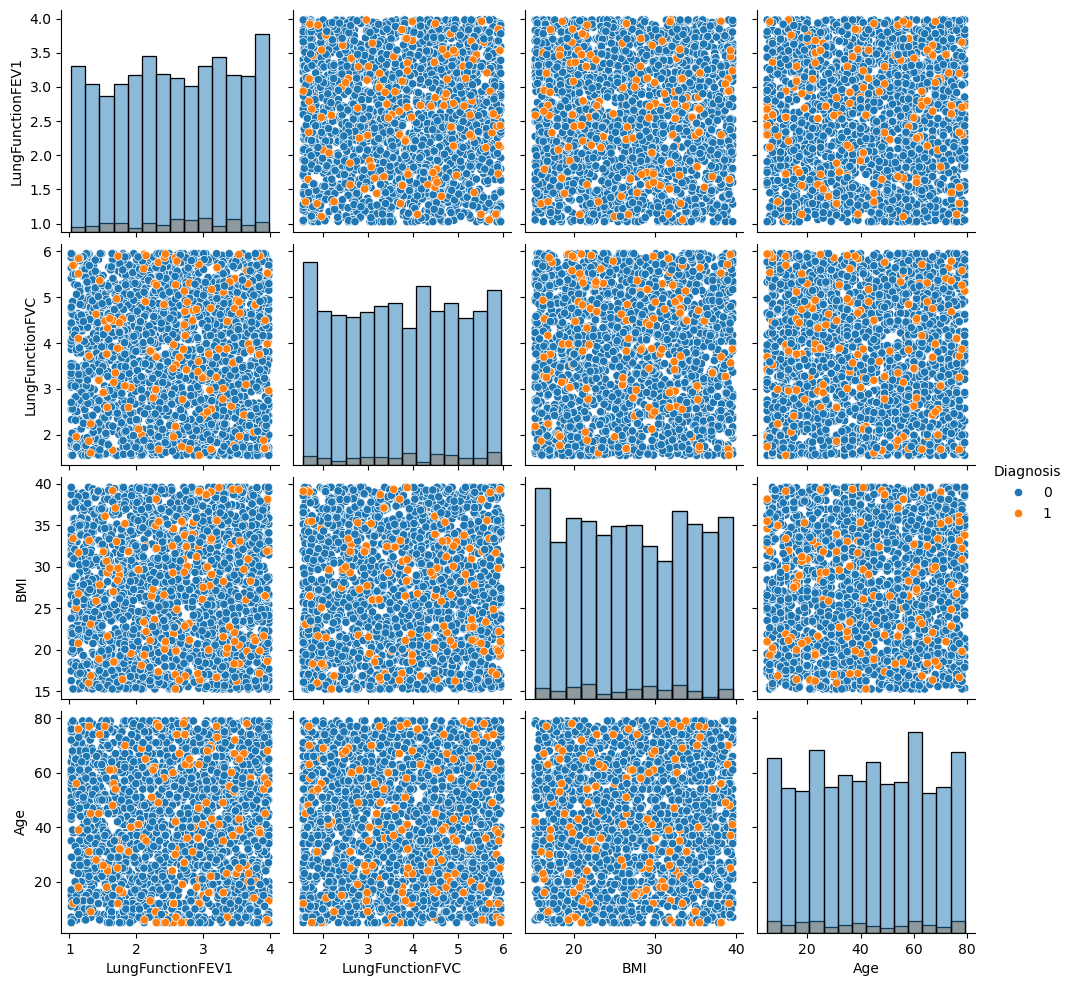

In [29]:
subset = [c for c in ["LungFunctionFEV1", "LungFunctionFVC", "BMI", "Age", "Diagnosis"] if c in df.columns]
if len(subset) >= 3:
    sns.pairplot(df[subset], hue="Diagnosis", diag_kind="hist")
    plt.show()
else:
    print("Not enough columns available for a useful pairplot.")

## Problem 4 – Exploratory Data Analysis (EDA) – Summary

In this step, we explored the **cleaned dataset** to understand underlying patterns, relationships, and potential predictive features for asthma diagnosis.

### 1. Target variable distribution
- The `Diagnosis` variable is **highly imbalanced**:
  - ~95% negative cases
  - ~5% positive cases  
- This imbalance suggests:
  - Using stratified train/test splits
  - Evaluating with metrics like **ROC-AUC**, **PR-AUC**, or **F1-score** instead of plain accuracy

### 2. Numeric feature distributions
- Histograms revealed:
  - Some features (e.g., `Age`, `BMI`) are roughly uniform
  - Others (e.g., `EducationLevel`, `Smoking`) are **discrete** despite numeric storage
  - Certain variables are skewed and may benefit from transformation

### 3. Correlation analysis (numeric features)
- Pearson heatmap shows generally **weak correlations** between most features
- Stronger correlation observed between:
  - `LungFunctionFEV1` and `LungFunctionFVC`
- Most features are fairly independent → reduces redundancy, but may require combining multiple weak predictors for better performance

### 4. Correlation with target (`Diagnosis`)
- Features with the strongest (though still modest) positive correlation to asthma diagnosis:
  - `ExerciseInduced`
  - `ChestTightness`
  - `LungFunctionFVC`
  - `Wheezing`
  - `DustExposure`
- These are potentially **clinically relevant** predictors

### 5. Grouped distributions
- Boxplots showed **subtle differences** in:
  - Lung function measures
  - BMI
  - Age  
  between positive and negative cases

### 6. Pairplot analysis
- Pairplot of continuous features (`LungFunctionFEV1`, `LungFunctionFVC`, `BMI`, `Age`) colored by `Diagnosis`:
  - High overlap between classes
  - Some separation in lung function features

---

**Key takeaways:**
- Dataset is **imbalanced**, requiring careful handling in modeling
- Lung function measures and certain symptom-related features show the **most promise** as predictive signals
- Weak correlation among features → good for avoiding multicollinearity, but model performance will depend on combining multiple weak predictors

